### Student Name : Manoj Kumar Thangaraj
### Student Number : 10570753
### Module : Web Data and Mining

Data Set Information: This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad").

Attribute Information: (3 continous; others binary; this is the "STANDARD encoding" mentioned in the [Kushmerick, 99].) One or more of the three continous features are missing in 28% of the instances; missing values should be interpreted as "unknown".

In [ ]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

In [31]:
#read the dataframe

df = pd.read_csv("ad.data", header=None, skipinitialspace=True, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


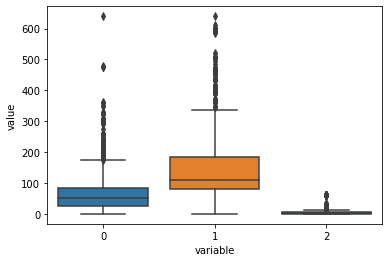

In [3]:
# we will now look at the boxplot of the first three continous variables

col_list = [0,1,2]
sns.boxplot(data=df.melt(value_vars=col_list),
            x='variable', y='value')

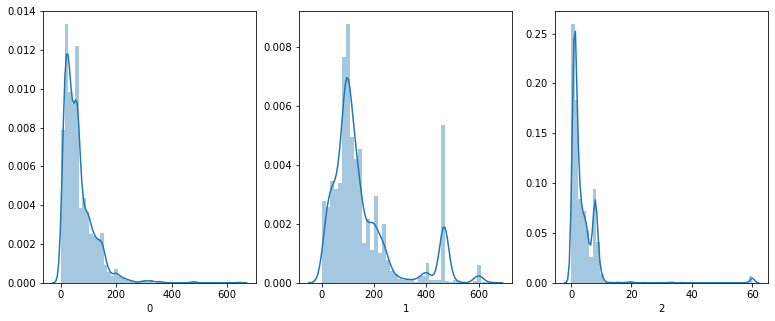

In [4]:
# sns distribution plot for the three continous variables

fig,ax=plt.subplots(nrows=1,ncols=3)
fig.set_figheight(5)
fig.set_figwidth(13)
sns.distplot(df[0],ax=ax[0])
sns.distplot(df[1],ax=ax[1])
sns.distplot(df[2],ax=ax[2])

The height, width and aspect ratio of the images are not fairly distributed.

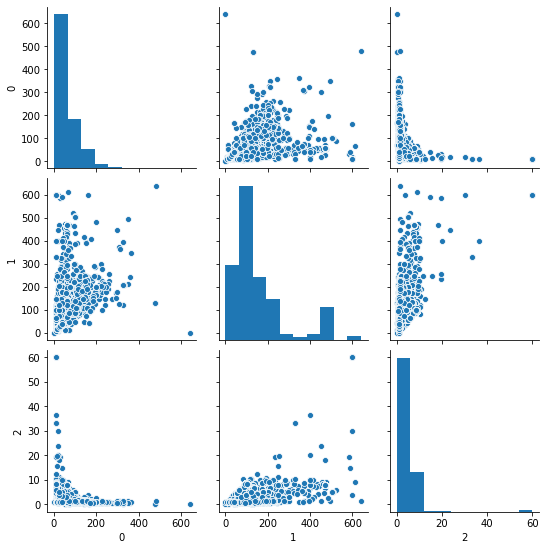

In [5]:
# sns pair plot for the three continous variables

sns.pairplot(data=df.iloc[:,[0,1,2,1558]])
fig.set_figheight(3)
fig.set_figwidth(5)

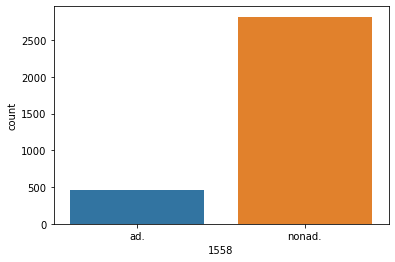

In [6]:
#sns count plot for the target variable

sns.countplot(x=1558, data=df)

We can notice that there is high imbalance in the data

### Data Preprocessing 

In [32]:
#Label Encoding for the classes in the target varible

Label_Encoder_X = LabelEncoder()  #defining the model
df[1558] = Label_Encoder_X.fit_transform(df[1558])   #fitting the model in the class column which is 1558

In [33]:
#we will make a copies of the dataframe as there are different models that are using this dataset

df_0 = df.copy()
df_0.iloc[:,:4] = df_0.iloc[:,:4].replace(np.NaN,0)  #this is the first method, replacing the Nan value with zero

In [34]:
# split dataset into feature and target variable

X=df_0.iloc[:,:-1]    #independent variables
y=df_0.iloc[:,-1]    #dependent variables

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [36]:
counter  = Counter(y_train)  #counts the number in each class of the dataset
print("Before", counter)

smt  = SMOTE()       #defining the smote model
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)    #fitting them on the training dataset

counter = Counter(y_train_sm)  #counting after smote fit
print("After", counter)

Before Counter({1: 1958, 0: 337})
After Counter({0: 1958, 1: 1958})


### Executing Models with replace missing values with 0 and without feature reduction and Evaluation

#### Support Vector Machine (SVM)

In [37]:
#Create a svm Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree =3, gamma='auto') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train_sm, y_train_sm)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8861788617886179


In [38]:
#printing the classification report

print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.73      0.61       122
           1       0.96      0.91      0.93       862

    accuracy                           0.89       984
   macro avg       0.74      0.82      0.77       984
weighted avg       0.91      0.89      0.89       984



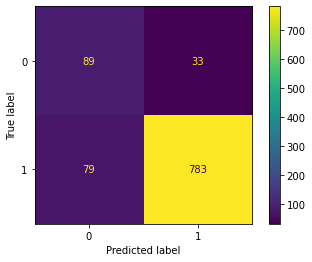

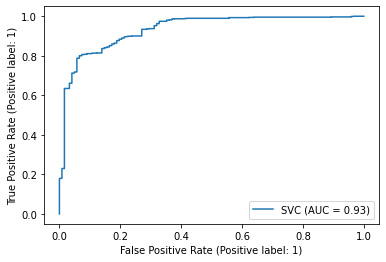

In [39]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

#### Random Forest Classifier

In [40]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(X_train_sm,y_train_sm)

y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing the classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9471544715447154
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       122
           1       0.99      0.95      0.97       862

    accuracy                           0.95       984
   macro avg       0.86      0.94      0.89       984
weighted avg       0.96      0.95      0.95       984



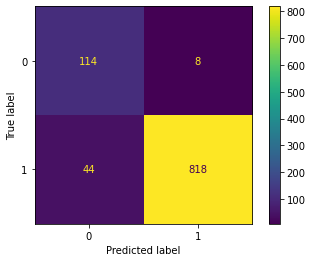

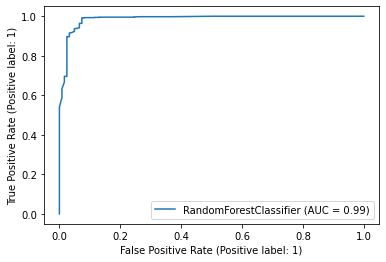

In [41]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

In [42]:
# all parameters not specified are set to their defaults
clf = LogisticRegression()

# Train the model using training sets
clf.fit(X_train_sm, y_train_sm)

#make predictions
y_pred = clf.predict(X_test)

#printing the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing the classification report
print(classification_report(y_test, y_pred, labels=[0,1]))



Accuracy: 0.948170731707317
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       122
           1       0.99      0.95      0.97       862

    accuracy                           0.95       984
   macro avg       0.86      0.94      0.89       984
weighted avg       0.96      0.95      0.95       984



C:\Users\manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


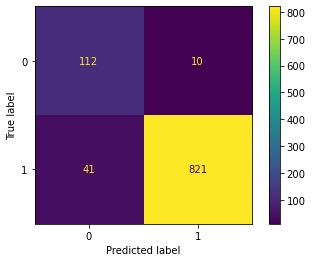

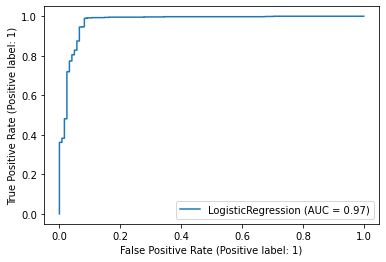

In [43]:
#plotting confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

### Executing Models with KNN Imputer and without feature reduction and Evaluation

In [44]:
#making a copy of dataframe for imputation
df_KNN = df.copy()

#fitting the KNN imputer 
imputer = KNNImputer(n_neighbors=2, weights="uniform")

#transforming
X1 = imputer.fit_transform(df_KNN)

#converting NumPy array in list
X1 = list(X1)

#converting list into a dataframe
dfKNN = pd.DataFrame(X1)

# split dataset into feature and target variable
X=dfKNN.iloc[:,:-1]
y=dfKNN.iloc[:,-1]

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

smt  = SMOTE()  #SMOTE sampling
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train) #resampling the training sets

#### Support Vector Machine (SVM)

In [46]:
#Create a svm Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree =3, gamma='auto') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train_sm, y_train_sm)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing the classfication report 
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.931910569105691
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       122
           1       0.97      0.95      0.96       862

    accuracy                           0.93       984
   macro avg       0.83      0.89      0.86       984
weighted avg       0.94      0.93      0.93       984



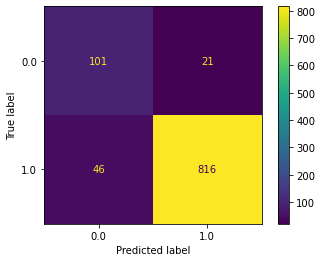

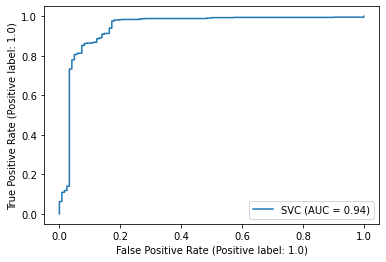

In [47]:
#plotting confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

#### Random Forest

In [48]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_sm,y_train_sm)

#make predictions
y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printig the classfication report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9847560975609756
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       122
           1       0.99      1.00      0.99       862

    accuracy                           0.98       984
   macro avg       0.98      0.95      0.96       984
weighted avg       0.98      0.98      0.98       984



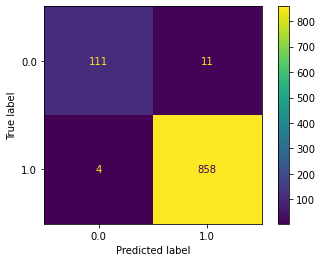

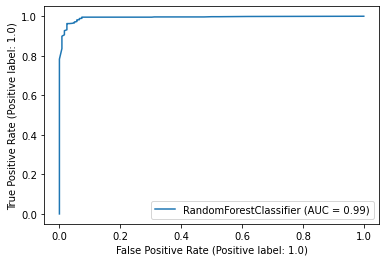

In [49]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

In [50]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = RandomForestClassifier(n_estimators=100)

# evaluate model
scores = cross_val_score(model, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.991 (0.006)


#### Logistic Regression

In [51]:
# all parameters not specified are set to their defaults
clf = LogisticRegression()

#training the dataset
clf.fit(X_train_sm, y_train_sm)

#make predictions
y_pred = clf.predict(X_test)

#overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing the classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9725609756097561
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       122
           1       0.99      0.98      0.98       862

    accuracy                           0.97       984
   macro avg       0.92      0.96      0.94       984
weighted avg       0.97      0.97      0.97       984



C:\Users\manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


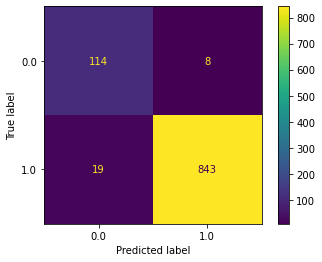

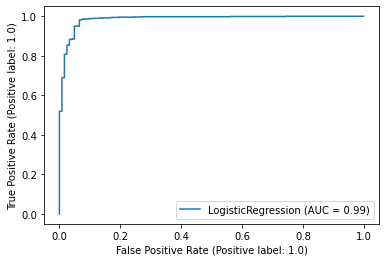

In [52]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

### Executing Models with Iterative Imputer and without feature reduction and Evaluation

In [53]:
#making a copy of dataframe for imputation
df_IM = df.copy()

#fitting the KNN imputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_IM[[0,1,2]])     #fitting done on the three continous variables

#transforming
X = imp_mean.transform(df_IM[[0,1,2]])

#converting NumPy array in list
X = list(X)

#converting list into a dataframe
dfIM = pd.DataFrame(X)

#dropping the first three columns on the old dataset
df_IM = df_IM.drop([0,1,2], axis=1)

#concating the newly processed and the old one
df1 = pd.concat([dfIM,df_IM], axis = 1)

#making a copy of the dataset as a backup
df2 = df1.copy()

#now dropping all the missing values in column number 4 which is binary
df2 = df2.dropna()

# split dataset into feature and target variable

X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [54]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

smt  = SMOTE()   #SMOTE sampling
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)  #fit the resampling

#### Support Vector Machine 

In [55]:
#Create a svm Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree =3, gamma='auto') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train_sm, y_train_sm)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.8948979591836734
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       120
           1       0.96      0.91      0.94       860

    accuracy                           0.89       980
   macro avg       0.76      0.84      0.79       980
weighted avg       0.91      0.89      0.90       980



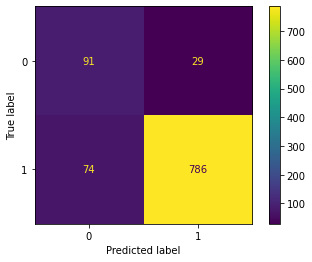

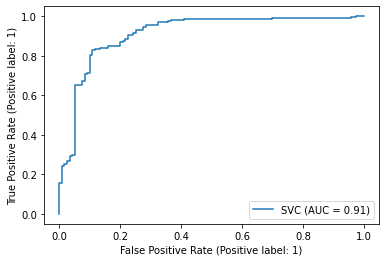

In [56]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

#### Random Forest

In [57]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_sm,y_train_sm)

#make predictions
y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing the classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9336734693877551
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       120
           1       0.99      0.93      0.96       860

    accuracy                           0.93       980
   macro avg       0.83      0.93      0.87       980
weighted avg       0.95      0.93      0.94       980



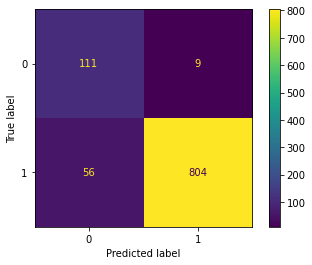

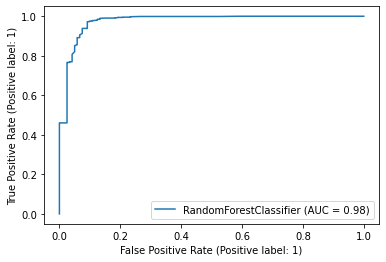

In [58]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

#### Logistic Regression

In [59]:
# all parameters not specified are set to their defaults
clf = LogisticRegression()

#tarin the datasets
clf.fit(X_train_sm, y_train_sm)

#make predictions
y_pred = clf.predict(X_test)

#Accucracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#printing Classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9510204081632653
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       120
           1       0.99      0.96      0.97       860

    accuracy                           0.95       980
   macro avg       0.87      0.93      0.90       980
weighted avg       0.96      0.95      0.95       980



C:\Users\manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


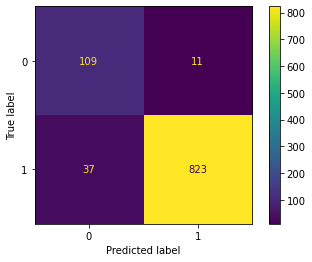

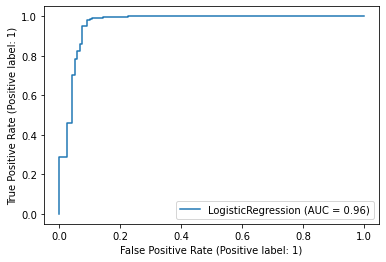

In [60]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

### Model with PCA reduction and KNN Imputation

In [61]:
# split dataset into feature and target variable

X=dfKNN.iloc[:,:-1]
y=dfKNN.iloc[:,-1]

In [62]:
#PCA with 2 components

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

#convert them into a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [63]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.3,random_state=109) # 70% training and 30% test

smt  = SMOTE()  #SMOTE sampling
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)  #sample the train datasets

#### Support Vector Machine

In [70]:
#Create a svm Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree =3, gamma='auto') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train_sm, y_train_sm)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9664634146341463
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       122
           1       0.99      0.98      0.98       862

    accuracy                           0.97       984
   macro avg       0.91      0.94      0.93       984
weighted avg       0.97      0.97      0.97       984



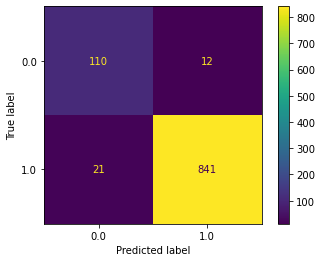

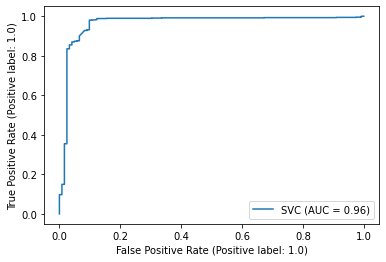

In [65]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

In [66]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = svm.SVC(C=1.0, kernel='rbf', degree =3, gamma='auto')

# evaluate model
scores = cross_val_score(model, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.934 (0.009)


#### Random Forest

In [67]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_sm,y_train_sm)

y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       122
           1       0.99      0.96      0.97       862

    accuracy                           0.95       984
   macro avg       0.87      0.94      0.90       984
weighted avg       0.96      0.95      0.95       984



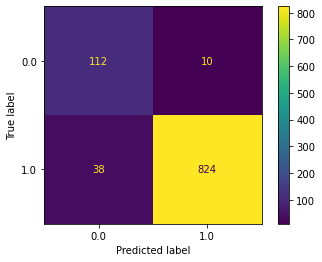

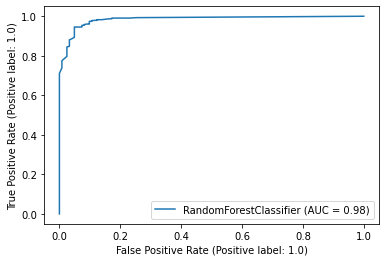

In [68]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

#### Logistic Regression

In [72]:
# all parameters not specified are set to their defaults
clf = LogisticRegression()

#train the datasets
clf.fit(X_train_sm, y_train_sm)

#make predicitons
y_pred = clf.predict(X_test)

# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 0.8465447154471545
              precision    recall  f1-score   support

           0       0.43      0.70      0.53       122
           1       0.95      0.87      0.91       862

    accuracy                           0.85       984
   macro avg       0.69      0.79      0.72       984
weighted avg       0.89      0.85      0.86       984



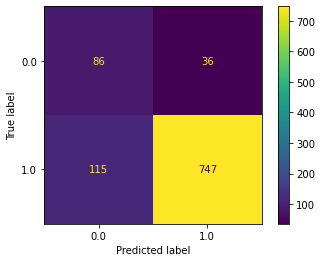

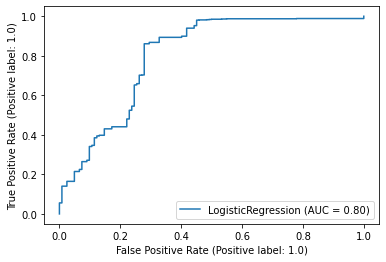

In [73]:
#plot confusion matrix and roc curve

plot_confusion_matrix(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show() 

Out of all the models and evaluation, Random forest classifier with KNN imputation and No feature reduction technique yielded high overall accuracy rate and K-fold cross validation followed by the SVM with KNN imputation and PCA transformation.